In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/home/david/Documentos/Analisisdevariables/Graficar boxplots'

In [2]:
datos = pd.read_csv("datosabm.csv")
datos.head()


,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,ADI,ACItf,BI,TE,ESM,NDSI,P,M,MIDBNT,MD,FM,SF,cluster,label
0,13654-SM5071__0__20170202_034000.wav,0.690695,1657.156469,2543.075990,5489.708471,0.000000,1.695777,45163.038106,0.999886,0.966630,0.921355,24.430695,789.255191,0.021858,-100.35151,-8.764474,40.122620,0.104645,Cluster7,Alta
1,13654-SM5071__0__20170214_125000.wav,0.903377,1637.015007,3035.014862,5725.157047,0.000000,0.486196,44696.404254,0.999970,0.921059,0.349031,2.072345,780.001271,0.127244,-100.35151,-9.474842,40.178186,0.375743,Cluster7,Alta
2,13654-SM5071__0__20170124_155000.wav,0.887091,2111.695309,3435.153118,7233.906258,0.000003,0.603109,44632.051399,0.999923,0.885995,-0.005463,0.989133,781.472125,0.062451,-100.35151,-10.954779,40.193273,0.172189,Cluster7,Alta
3,13654-SM5071__0__20170216_062000.wav,0.904979,891.760079,2202.454371,1938.763277,0.000000,1.468066,44912.396001,0.999987,0.985800,0.454960,2.669455,788.103558,0.127244,-100.35151,-9.099079,40.065809,0.609970,Cluster7,Alta
4,13654-SM5071__0__20170216_161000.wav,0.905819,707.012431,1926.155526,949.019261,0.000000,0.470851,44720.803509,0.999981,0.958402,-0.443680,0.385349,778.089187,0.123341,-100.35151,-8.511960,40.137089,0.334119,Cluster7,Alta


In [11]:
datos.shape

(128, 20)

In [21]:
d=datos.iloc[:,1:18].copy()

In [22]:
metadata=datos[['filename','cluster','label']]



In [23]:
d.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,ADI,ACItf,BI,TE,ESM,NDSI,P,M,MIDBNT,MD,FM,SF
0,0.690695,1657.156469,2543.075990,5489.708471,0.000000,1.695777,45163.038106,0.999886,0.966630,0.921355,24.430695,789.255191,0.021858,-100.35151,-8.764474,40.122620,0.104645
1,0.903377,1637.015007,3035.014862,5725.157047,0.000000,0.486196,44696.404254,0.999970,0.921059,0.349031,2.072345,780.001271,0.127244,-100.35151,-9.474842,40.178186,0.375743
2,0.887091,2111.695309,3435.153118,7233.906258,0.000003,0.603109,44632.051399,0.999923,0.885995,-0.005463,0.989133,781.472125,0.062451,-100.35151,-10.954779,40.193273,0.172189
3,0.904979,891.760079,2202.454371,1938.763277,0.000000,1.468066,44912.396001,0.999987,0.985800,0.454960,2.669455,788.103558,0.127244,-100.35151,-9.099079,40.065809,0.609970
4,0.905819,707.012431,1926.155526,949.019261,0.000000,0.470851,44720.803509,0.999981,0.958402,-0.443680,0.385349,778.089187,0.123341,-100.35151,-8.511960,40.137089,0.334119


In [30]:
x= StandardScaler().fit_transform(d.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=d.index,columns=d.columns) #so we need to transform it 
d=scalx.copy()
scalx.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,ADI,ACItf,BI,TE,ESM,NDSI,P,M,MIDBNT,MD,FM,SF
0,0.509613,-0.835038,-0.427938,-0.036821,-0.500415,0.034893,-0.295226,0.811240,0.330693,0.690155,-0.409090,0.975908,-0.562585,0.0,0.963820,0.701958,-0.438305
1,1.327369,-0.852652,0.844658,0.097685,-0.500415,-1.596183,-0.682655,0.834769,-1.370350,-0.495058,-0.554661,0.931711,1.873878,0.0,0.668605,1.075542,0.987976
2,1.264749,-0.437524,1.879776,0.959597,-0.500368,-1.438529,-0.736085,0.821551,-2.679217,-1.229174,-0.561714,0.938735,0.375904,0.0,0.053573,1.176972,-0.082945
3,1.333530,-1.504409,-1.309092,-2.065389,-0.500415,-0.272167,-0.503325,0.839515,1.046281,-0.275693,-0.550773,0.970407,1.873878,0.0,0.824765,0.320004,2.220277
4,1.336758,-1.665979,-2.023850,-2.630806,-0.500415,-1.616874,-0.662398,0.837893,0.023557,-2.136668,-0.565645,0.922578,1.783639,0.0,1.068760,0.799233,0.768988


In [31]:
d=d.drop(['MIDBNT'], axis = 1)

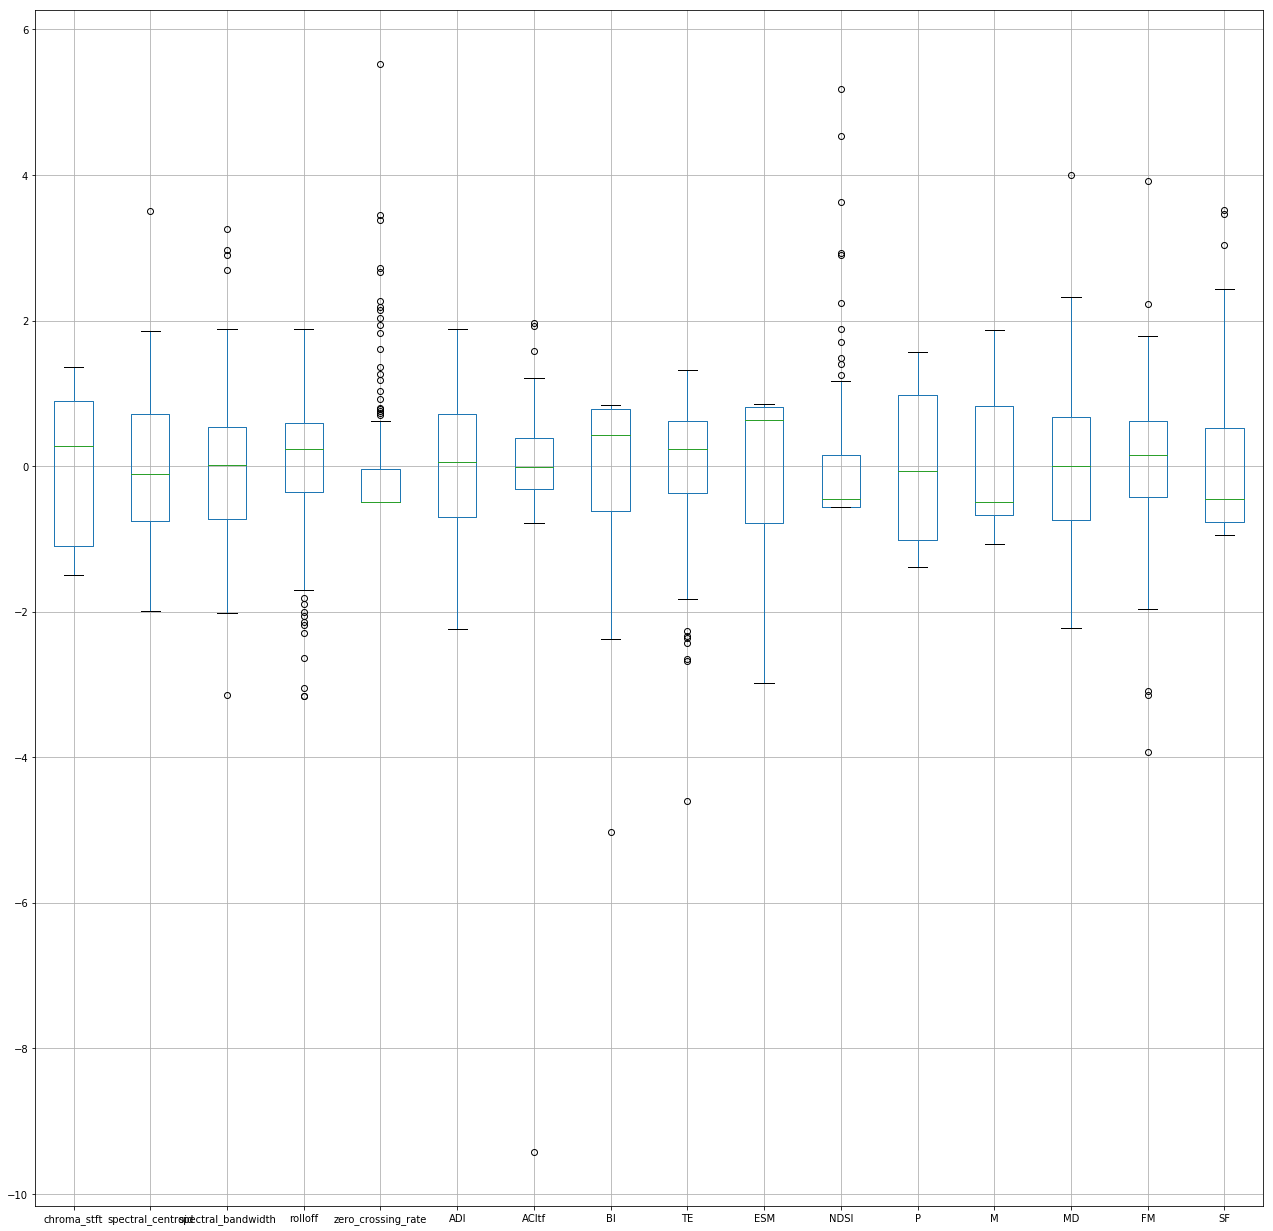

In [32]:
d.boxplot(figsize = (22,22))

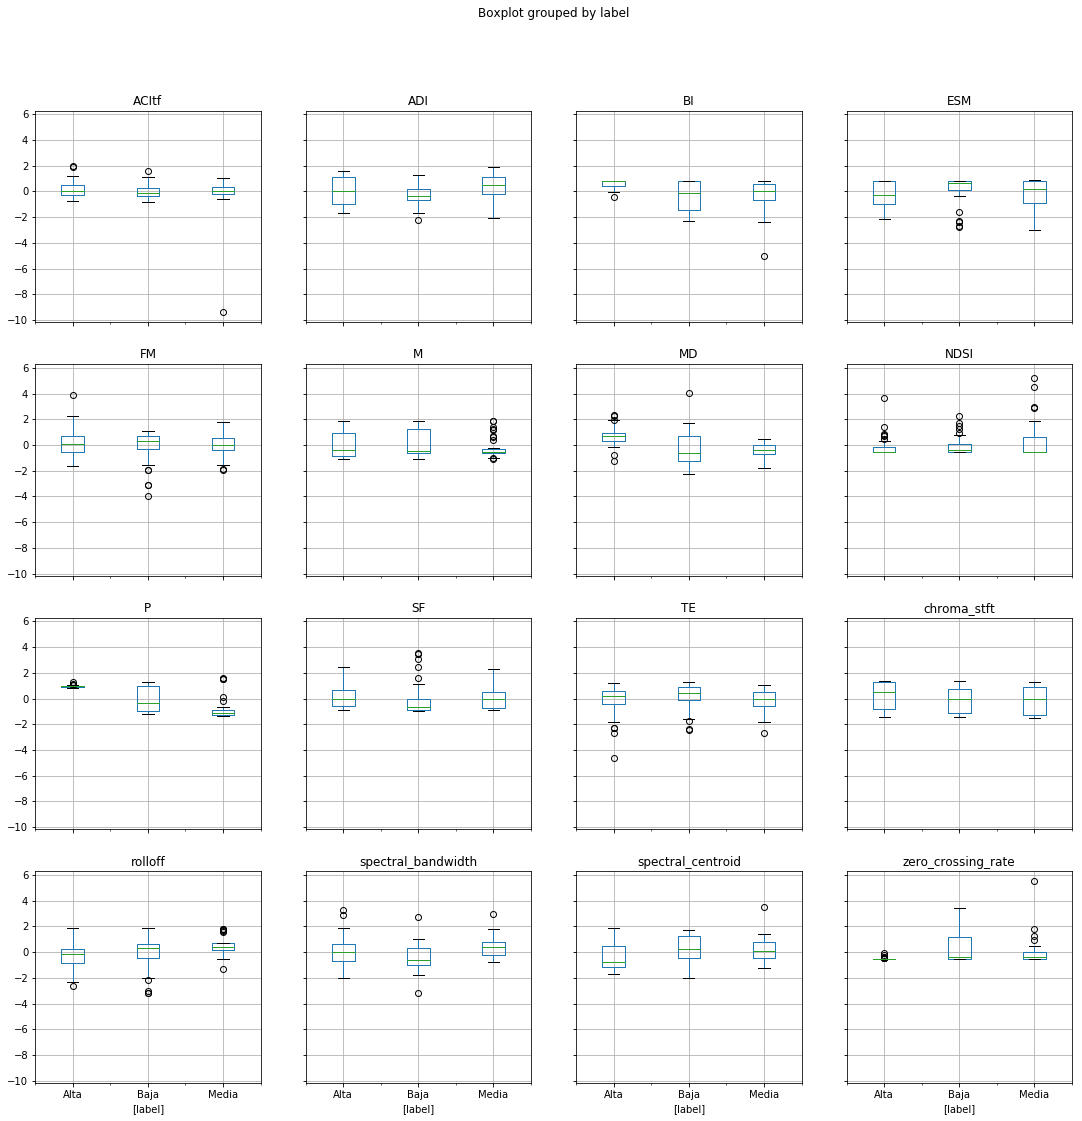

In [39]:

scalxlabel=d.copy()
scalxlabel['label']= metadata.label
fig=scalxlabel.boxplot(figsize = (18,18),by='label')


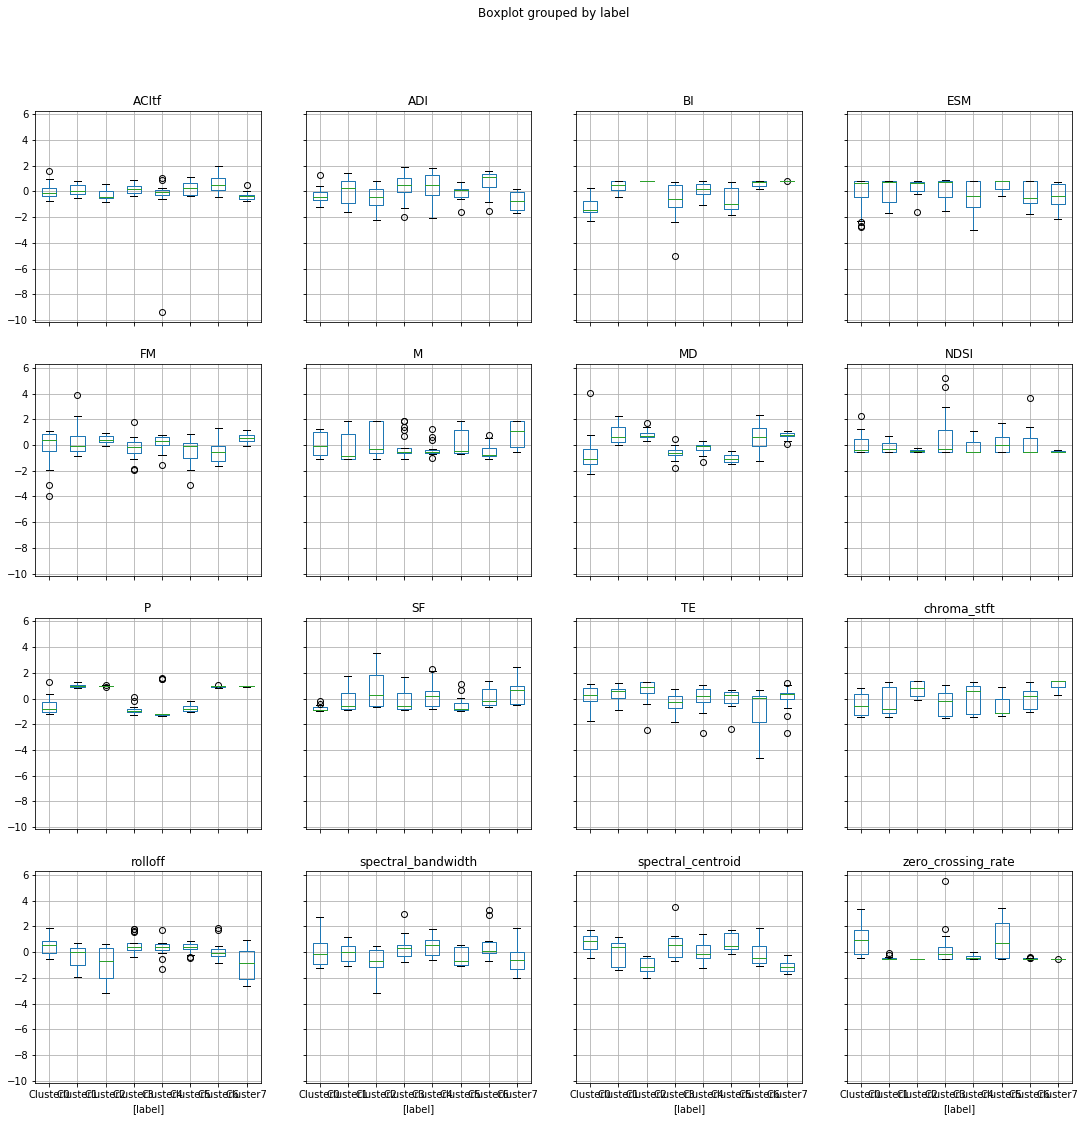

In [40]:
scalxlabel=d.copy()
scalxlabel['label']= metadata.cluster
fig=scalxlabel.boxplot(figsize = (18,18),by='label')